In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [79]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [80]:
tms_acutal_dir = "../../data/actual/TMS_Actual.csv"
flow_acutal_dir = "../../data/actual/FLOW_Actual.csv"
aws368_dir = "../../data/actual/AWS_368.csv"
aws541_dir = "../../data/actual/AWS_541.csv"
aws569_dir = "../../data/actual/AWS_569.csv"

In [81]:
tms = pd.read_csv(tms_acutal_dir)
flow = pd.read_csv(flow_acutal_dir)
aws368 = pd.read_csv(aws368_dir)
aws541 = pd.read_csv(aws541_dir)
aws569 = pd.read_csv(aws569_dir)

In [82]:
flow = flow.drop(columns=['data_save_dt'])
aws368 = aws368.drop(columns=['YYMMDDHHMI','STN'])
aws541 = aws541.drop(columns=['YYMMDDHHMI','STN'])
aws569 = aws569.drop(columns=['YYMMDDHHMI','STN'])

In [32]:
tms['SYS_TIME'] = pd.to_datetime(tms['SYS_TIME'])
flow['SYS_TIME'] = pd.to_datetime(flow['SYS_TIME'])
aws368['datetime'] = pd.to_datetime(aws368['datetime'])
aws541['datetime'] = pd.to_datetime(aws541['datetime'])
aws569['datetime'] = pd.to_datetime(aws569['datetime'])

### 단순 선형 보간 + join

In [5]:
tms = tms.set_index('SYS_TIME').interpolate(method="linear")
flow = flow.set_index('SYS_TIME').interpolate(method="linear")
aws368 = aws368.set_index('datetime').interpolate(method="linear")
aws541 = aws541.set_index('datetime').interpolate(method="linear")
aws569 = aws569.set_index('datetime').interpolate(method="linear")

In [88]:
tms.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 514551 entries, 2024-08-26 15:09:00 to 2025-09-29 05:23:00
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TOC_VU   514551 non-null  float64
 1   PH_VU    514551 non-null  float64
 2   SS_VU    514551 non-null  float64
 3   FLUX_VU  514551 non-null  float64
 4   TN_VU    514551 non-null  float64
 5   TP_VU    514551 non-null  float64
dtypes: float64(6)
memory usage: 27.5 MB


In [6]:
# 컬럼명 변경
aws368 = aws368.add_suffix('_368')
aws541 = aws541.add_suffix('_541')
aws569 = aws569.add_suffix('_569')

# join
flow_df = flow.join([aws368, aws541, aws569], how='left')
tms_df = tms.join([aws368, aws541, aws569], how='left')
all_df = flow.join([tms, aws368, aws541, aws569], how = "inner")

In [7]:
# 특정 패턴 포함 컬럼 삭제
cols_to_drop = [col for col in flow_df.columns if col in ['data_save_dt', 'YYMMDDHHMI_368', 'YYMMDDHHMI_541', 'YYMMDDHHMI_569', 'STN_368', 'STN_541', 'STN_569']]
flow_df = flow_df.drop(columns=cols_to_drop)

# 특정 패턴 포함 컬럼 삭제
cols_to_drop = [col for col in tms_df.columns if col in ['data_save_dt', 'YYMMDDHHMI_368', 'YYMMDDHHMI_541', 'YYMMDDHHMI_569', 'STN_368', 'STN_541', 'STN_569']]
tms_df = tms_df.drop(columns=cols_to_drop)

# 특정 패턴 포함 컬럼 삭제
cols_to_drop = [col for col in all_df.columns if col in ['data_save_dt', 'YYMMDDHHMI_368', 'YYMMDDHHMI_541', 'YYMMDDHHMI_569', 'STN_368', 'STN_541', 'STN_569']]
all_df = all_df.drop(columns=cols_to_drop)

In [93]:
flow_df

,flow_TankA,flow_TankB,level_TankA,level_TankB,TA_368,RN_15m_368,RN_60m_368,RN_12H_368,RN_DAY_368,HM_368,...,RN_DAY_541,HM_541,TD_541,TA_569,RN_15m_569,RN_60m_569,RN_12H_569,RN_DAY_569,HM_569,TD_569
SYS_TIME,,,,,,,,,,,,,,,,,,,,,
2025-09-02 23:53:00,230.4000,230.2500,3.55225,3.54900,23.5,0.0,0.0,0.0,0.0,83.9,...,0.0,92.7,21.6,22.9,0.0,0.0,0.0,0.0,86.7,20.6
2025-09-02 23:54:00,229.9875,230.1000,3.54700,3.54575,23.5,0.0,0.0,0.0,0.0,84.0,...,0.0,92.6,21.5,22.9,0.0,0.0,0.0,0.0,87.2,20.7
2025-09-02 23:55:00,229.5000,230.0625,3.54825,3.54475,23.5,0.0,0.0,0.0,0.0,84.1,...,0.0,92.6,21.5,22.9,0.0,0.0,0.0,0.0,87.3,20.7
2025-09-02 23:56:00,229.8375,230.4750,3.54125,3.54250,23.5,0.0,0.0,0.0,0.0,84.1,...,0.0,92.6,21.5,22.9,0.0,0.0,0.0,0.0,86.8,20.6
2025-09-02 23:57:00,229.9125,230.0250,3.54050,3.54050,23.5,0.0,0.0,0.0,0.0,84.1,...,0.0,92.5,21.5,23.0,0.0,0.0,0.0,0.0,86.9,20.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-03 10:35:00,199.8000,200.6250,2.43450,2.42275,-6.1,0.0,0.0,0.0,0.0,25.3,...,0.0,26.2,-21.7,-5.0,0.0,0.0,0.0,0.0,24.3,-22.3
2025-12-03 10:36:00,199.0125,200.1375,2.43200,2.42350,-6.1,0.0,0.0,0.0,0.0,25.6,...,0.0,26.4,-21.5,-4.9,0.0,0.0,0.0,0.0,24.0,-22.4
2025-12-03 10:37:00,199.5750,199.3875,2.42975,2.42650,-6.0,0.0,0.0,0.0,0.0,25.7,...,0.0,26.5,-21.4,-4.7,0.0,0.0,0.0,0.0,24.1,-22.2


In [95]:
tms_df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 514551 entries, 2024-08-26 15:09:00 to 2025-09-29 05:23:00
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   TOC_VU      514551 non-null  float64
 1   PH_VU       514551 non-null  float64
 2   SS_VU       514551 non-null  float64
 3   FLUX_VU     514551 non-null  float64
 4   TN_VU       514551 non-null  float64
 5   TP_VU       514551 non-null  float64
 6   TA_368      514551 non-null  float64
 7   RN_15m_368  514551 non-null  float64
 8   RN_60m_368  514551 non-null  float64
 9   RN_12H_368  514551 non-null  float64
 10  RN_DAY_368  514551 non-null  float64
 11  HM_368      514551 non-null  float64
 12  TD_368      514551 non-null  float64
 13  TA_541      514551 non-null  float64
 14  RN_15m_541  514551 non-null  float64
 15  RN_60m_541  514551 non-null  float64
 16  RN_12H_541  514551 non-null  float64
 17  RN_DAY_541  514551 non-null  float64
 18  HM_541      514551 no

In [97]:
all_df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 37486 entries, 2025-09-02 23:53:00 to 2025-09-29 05:23:00
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   flow_TankA   37486 non-null  float64
 1   flow_TankB   37486 non-null  float64
 2   level_TankA  37486 non-null  float64
 3   level_TankB  37486 non-null  float64
 4   TOC_VU       37486 non-null  float64
 5   PH_VU        37486 non-null  float64
 6   SS_VU        37486 non-null  float64
 7   FLUX_VU      37486 non-null  float64
 8   TN_VU        37486 non-null  float64
 9   TP_VU        37486 non-null  float64
 10  TA_368       37486 non-null  float64
 11  RN_15m_368   37486 non-null  float64
 12  RN_60m_368   37486 non-null  float64
 13  RN_12H_368   37486 non-null  float64
 14  RN_DAY_368   37486 non-null  float64
 15  HM_368       37486 non-null  float64
 16  TD_368       37486 non-null  float64
 17  TA_541       37486 non-null  float64
 18  RN_15m_541   37486 non

In [8]:
flow_df.to_csv('../../data/processed/flow_proc.csv', date_format='%Y-%m-%d %H:%M:%S', index=True)
tms_df.to_csv('../../data/processed/tms_proc.csv', date_format='%Y-%m-%d %H:%M:%S', index=True)
all_df.to_csv('../../data/processed/all_proc.csv', date_format='%Y-%m-%d %H:%M:%S', index=True)

In [99]:
test = pd.read_csv('../../data/processed/flow_proc.csv', 
                   parse_dates=[0], 
                   index_col=0)
print(test.head())

                     flow_TankA  flow_TankB  level_TankA  level_TankB  TA_368  \
SYS_TIME                                                                        
2025-09-02 23:53:00    230.4000    230.2500      3.55225      3.54900    23.5   
2025-09-02 23:54:00    229.9875    230.1000      3.54700      3.54575    23.5   
2025-09-02 23:55:00    229.5000    230.0625      3.54825      3.54475    23.5   
2025-09-02 23:56:00    229.8375    230.4750      3.54125      3.54250    23.5   
2025-09-02 23:57:00    229.9125    230.0250      3.54050      3.54050    23.5   

                     RN_15m_368  RN_60m_368  RN_12H_368  RN_DAY_368  HM_368  \
SYS_TIME                                                                      
2025-09-02 23:53:00         0.0         0.0         0.0         0.0    83.9   
2025-09-02 23:54:00         0.0         0.0         0.0         0.0    84.0   
2025-09-02 23:55:00         0.0         0.0         0.0         0.0    84.1   
2025-09-02 23:56:00         0.0      

### 선형 보간 + time 보간 + forward fill 보간 + 이상치 처리 + 처리 전후 시각화

In [72]:
def ensure_1min_interval(df, time_col=None, keep_time_col=True):
    """
    1분 간격인지 확인하고, 누락된 분이 있으면 행을 추가한다.
    추가된 행의 값은 NaN으로 유지한다.
    """

    df = df.copy()

    # 1. 시간 인덱스 만들기
    if time_col is not None:
        df[time_col] = pd.to_datetime(df[time_col])

        if keep_time_col:
            df.index = df[time_col]
            df.index.name = time_col
        else :
            df = df.set_index(time_col)

    else:
        # time_col이 None이면 이미 DatetimeIndex라고 가정
        if not isinstance(df.index, pd.DatetimeIndex):
            raise ValueError("time_col이 None일 때는 DatetimeIndex여야 합니다.")

    df = df.sort_index()

    # 2. 현재 간격 확인
    diffs = df.index.to_series().diff().dropna()
    is_1min = (diffs == pd.Timedelta(minutes=1)).all()

    # 3. 1분이 아니면 reindex
    if not is_1min:
        full_index = pd.date_range(
            start=df.index.min(),
            end=df.index.max(),
            freq="1min"
        )
        df = df.reindex(full_index)

        if time_col is not None and keep_time_col:
            df[time_col] = df.index

    return df, is_1min

In [17]:
def detect_outliers_domain(series, col_name):
    """도메인 지식 기반 이상치 탐지 - 컬럼별 맞춤형"""
    
    outliers = pd.Series([False] * len(series), index=series.index)
    
    # TMS 수질 데이터
    if col_name == 'TOC_VU':  # 총유기탄소 (mg/L)
        outliers = (series < 0) | (series > 100)  # 일반적으로 0-50 범위
    
    elif col_name == 'PH_VU':  # pH
        outliers = (series < 0) | (series > 14)  # pH는 0-14 범위
    
    elif col_name == 'SS_VU':  # 부유물질 (mg/L)
        outliers = (series < 0) | (series > 500)  # 하수처리장 일반 범위
    
    elif col_name == 'FLUX_VU':  # 유량 (m³/day)
        outliers = (series < 0) | (series > series.quantile(0.99) * 3)
    
    elif col_name in ['TN_VU', 'TP_VU']:  # 총질소, 총인 (mg/L)
        outliers = (series < 0) | (series > 100)
    
    # FLOW 데이터
    elif col_name in ['flow_TankA', 'flow_TankB']:  # 유량
        outliers = (series < 0) | (series > series.quantile(0.99) * 3)
    
    elif col_name in ['level_TankA', 'level_TankB']:  # 수위 (m)
        outliers = (series < 0) | (series > 10)  # 일반적인 탱크 높이
    
    # AWS 기상 데이터
    elif col_name == 'TA':  # 기온 (°C)
        outliers = (series < -30) | (series > 45)  # 한국 기온 범위
    
    elif col_name in ['RN_15m', 'RN_60m', 'RN_12H', 'RN_DAY']:  # 강수량 (mm)
        outliers = (series < 0) | (series > 300)  # 일반적인 강수량 범위
    
    elif col_name == 'HM':  # 습도 (%)
        outliers = (series < 0) | (series > 100)  # 습도는 0-100%
    
    elif col_name == 'TD':  # 이슬점 온도 (°C)
        outliers = (series < -40) | (series > 35)
    
    else:
        # 기본값: 음수 또는 극단값
        outliers = (series < 0) | (series > series.quantile(0.999) * 2)
    
    return outliers

def detect_outliers(series, method='iqr', threshold=1.5, col_name=None):
    """이상치 탐지 - 개선 버전"""
    if method == 'iqr':
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - threshold * IQR
        upper = Q3 + threshold * IQR
        return (series < lower) | (series > upper)
    
    elif method == 'zscore':
        z_scores = np.abs(zscore(series.dropna()))
        return z_scores > threshold
    
    elif method == 'domain':
        if col_name:
            return detect_outliers_domain(series, col_name)
        else:
            # 컬럼명이 없으면 기본 도메인 규칙 적용
            return (series < 0) | (series > series.quantile(0.999) * 2)


In [73]:
def visualize_multiple_columns(df_original, df_processed, columns, df_name, time_col=None, save_path=None):
    """여러 컬럼의 처리 전후를 한 그래프에 시각화"""
    
    n_cols = len(columns)
    fig, axes = plt.subplots(n_cols, 1, figsize=(16, 4 * n_cols))
    
    if n_cols == 1:
        axes = [axes]
    
    # 시간 인덱스 설정
    if time_col in df_original.columns:
        x_original = pd.to_datetime(df_original[time_col])
        x_processed = pd.to_datetime(df_processed[time_col])
    else:
        x_original = range(len(df_original))
        x_processed = range(len(df_processed))
    
    for idx, col in enumerate(columns):
        ax = axes[idx]
        
        # 원본 데이터
        ax.plot(x_original, df_original[col], label='원본', alpha=0.5, linewidth=1, color='blue')
        
        # 처리 후 데이터
        ax.plot(x_processed, df_processed[col], label='처리 후', alpha=0.5, linewidth=1, color='green')
        
        # 이상치 표시
        #outliers = detect_outliers(df_original[col], method='iqr')
        #if outliers.sum() > 0:
        #    ax.scatter(x_original[outliers], df_original[col][outliers], 
        #              color='red', label=f'이상치 ({outliers.sum()}개)', s=20, zorder=5, alpha=0.6)
        
        # 결측치 영역 표시
        missing_original = df_original[col].isnull()
        if missing_original.sum() > 0:
            ax.fill_between(x_original, ax.get_ylim()[0], ax.get_ylim()[1], 
                           where=missing_original, alpha=0.1, color='gray', 
                           label=f'원본 결측 ({missing_original.sum()}개)')
        
        ax.set_title(f'{col} - 처리 전후 비교', fontsize=12, fontweight='bold')
        ax.set_xlabel('시간')
        ax.set_ylabel(col)
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(True, alpha=0.3)
        
        # 통계 정보 추가
        stats_text = (f'원본: 평균={df_original[col].mean():.2f}, 표준편차={df_original[col].std():.2f}\n'
                     f'처리 후: 평균={df_processed[col].mean():.2f}, 표준편차={df_processed[col].std():.2f}')
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
               fontsize=8, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"  시각화 저장: {save_path}")
    
    plt.show()

In [74]:
def create_summary_table(df_original, df_processed, columns, df_name):
    """처리 전후 요약 테이블 생성"""
    
    summary_data = []
    
    for col in columns:
        original_missing = df_original[col].isnull().sum()
        processed_missing = df_processed[col].isnull().sum()
        #outliers = detect_outliers(df_original[col], method='iqr').sum()
        
        summary_data.append({
            '컬럼': col,
            '원본_결측': original_missing,
            '원본_결측률(%)': f"{original_missing/len(df_original)*100:.2f}",
            #'이상치': outliers,
            #'이상치율(%)': f"{outliers/len(df_original)*100:.2f}",
            '처리후_결측': processed_missing,
            '원본_평균': f"{df_original[col].mean():.2f}",
            '처리후_평균': f"{df_processed[col].mean():.2f}",
            '원본_표준편차': f"{df_original[col].std():.2f}",
            '처리후_표준편차': f"{df_processed[col].std():.2f}"
        })
    
    summary_df = pd.DataFrame(summary_data)
    
    print(f"\n{'='*80}")
    print(f"[{df_name}] 처리 요약")
    print(f"{'='*80}")
    print(summary_df.to_string(index=False))
    
    return summary_df

In [75]:
def process_dataframe(df, columns, df_name, time_col='time', save_dir='../../results'):
    """데이터프레임의 여러 컬럼을 한번에 처리"""
    
    print(f"\n{'#'*80}")
    print(f"# [{df_name}] 데이터 처리 시작")
    print(f"{'#'*80}")
    
    df_original = df.copy()
    print(df[time_col])

    # 1. 먼저 1분 간격 확인 및 reindexing (전체 데이터프레임에 대해 한 번만)
    df_processed, was_1min = ensure_1min_interval(df, time_col)
    print(f"\n시간 간격 체크: {'이미 1분 간격' if was_1min else '1분 간격으로 리샘플링 완료'}")
    print(f"  원본 행 수: {len(df_original)}, 처리 후 행 수: {len(df_processed)}")
    
    # 각 컬럼 처리
    for col in columns:
        print(f"\n[{col}] 처리 중...")
        
        # 2. 결측치 처리
        original_missing = df_original[col].isnull().sum()
        current_missing = df_processed[col].isnull().sum()
        
        print(f"  결측치: 원본 {original_missing}개 → 이상치 처리 후 {current_missing}개")
        
        # 보간 적용
        # 짧은 결측: 선형 보간
        df_processed[col] = df_processed[col].interpolate(method='linear', limit=3)
        
        # 중간 결측: 시간 기반 보간
        df_processed[col] = df_processed[col].interpolate(method='time', limit=12)
        
        # 남은 결측: forward fill
        df_processed[col] = df_processed[col].ffill()
        
        final_missing = df_processed[col].isnull().sum()
        print(f"  보간 후 결측치: {final_missing}개")
    
    # 요약 테이블 생성
    summary_df = create_summary_table(df_original, df_processed, columns, df_name)
    
    # 시각화
    print(f"\n시각화 생성 중...")
    visualize_multiple_columns(df_original, df_processed, columns, df_name, time_col,
                               save_path=f'{save_dir}/{df_name}_before_after.png')
    
    # 요약 테이블 저장
    summary_df.to_csv(f'{save_dir}/{df_name}_summary.csv', index=False, encoding='utf-8-sig')
    print(f"  요약 테이블 저장: {save_dir}/{df_name}_summary.csv")
    
    return df_processed

In [76]:
tms_columns = ['TOC_VU', 'PH_VU', 'SS_VU', 'FLUX_VU', 'TN_VU', 'TP_VU']
flow_columns = ['flow_TankA', 'flow_TankB', 'level_TankA', 'level_TankB']
aws_columns = ['TA', 'RN_15m', 'RN_60m', 'RN_12H', 'RN_DAY', 'HM', 'TD']


################################################################################
# [TMS] 데이터 처리 시작
################################################################################
0         2024-08-26 15:09
1         2024-08-26 15:10
2         2024-08-26 15:11
3         2024-08-26 15:12
4         2024-08-26 15:13
                ...       
514546     2025-09-29 5:19
514547     2025-09-29 5:20
514548     2025-09-29 5:21
514549     2025-09-29 5:22
514550     2025-09-29 5:23
Name: SYS_TIME, Length: 514551, dtype: str

시간 간격 체크: 1분 간격으로 리샘플링 완료
  원본 행 수: 514551, 처리 후 행 수: 573975

[TOC_VU] 처리 중...
  결측치: 원본 88031개 → 이상치 처리 후 147455개
  보간 후 결측치: 0개

[PH_VU] 처리 중...
  결측치: 원본 88031개 → 이상치 처리 후 147455개
  보간 후 결측치: 0개

[SS_VU] 처리 중...
  결측치: 원본 88031개 → 이상치 처리 후 147455개
  보간 후 결측치: 0개

[FLUX_VU] 처리 중...
  결측치: 원본 88026개 → 이상치 처리 후 147450개
  보간 후 결측치: 0개

[TN_VU] 처리 중...
  결측치: 원본 88027개 → 이상치 처리 후 147451개
  보간 후 결측치: 0개

[TP_VU] 처리 중...
  결측치: 원본 88031개 → 이상치 처리 후 147455개
  보간 후 결측치: 0개

[TMS]

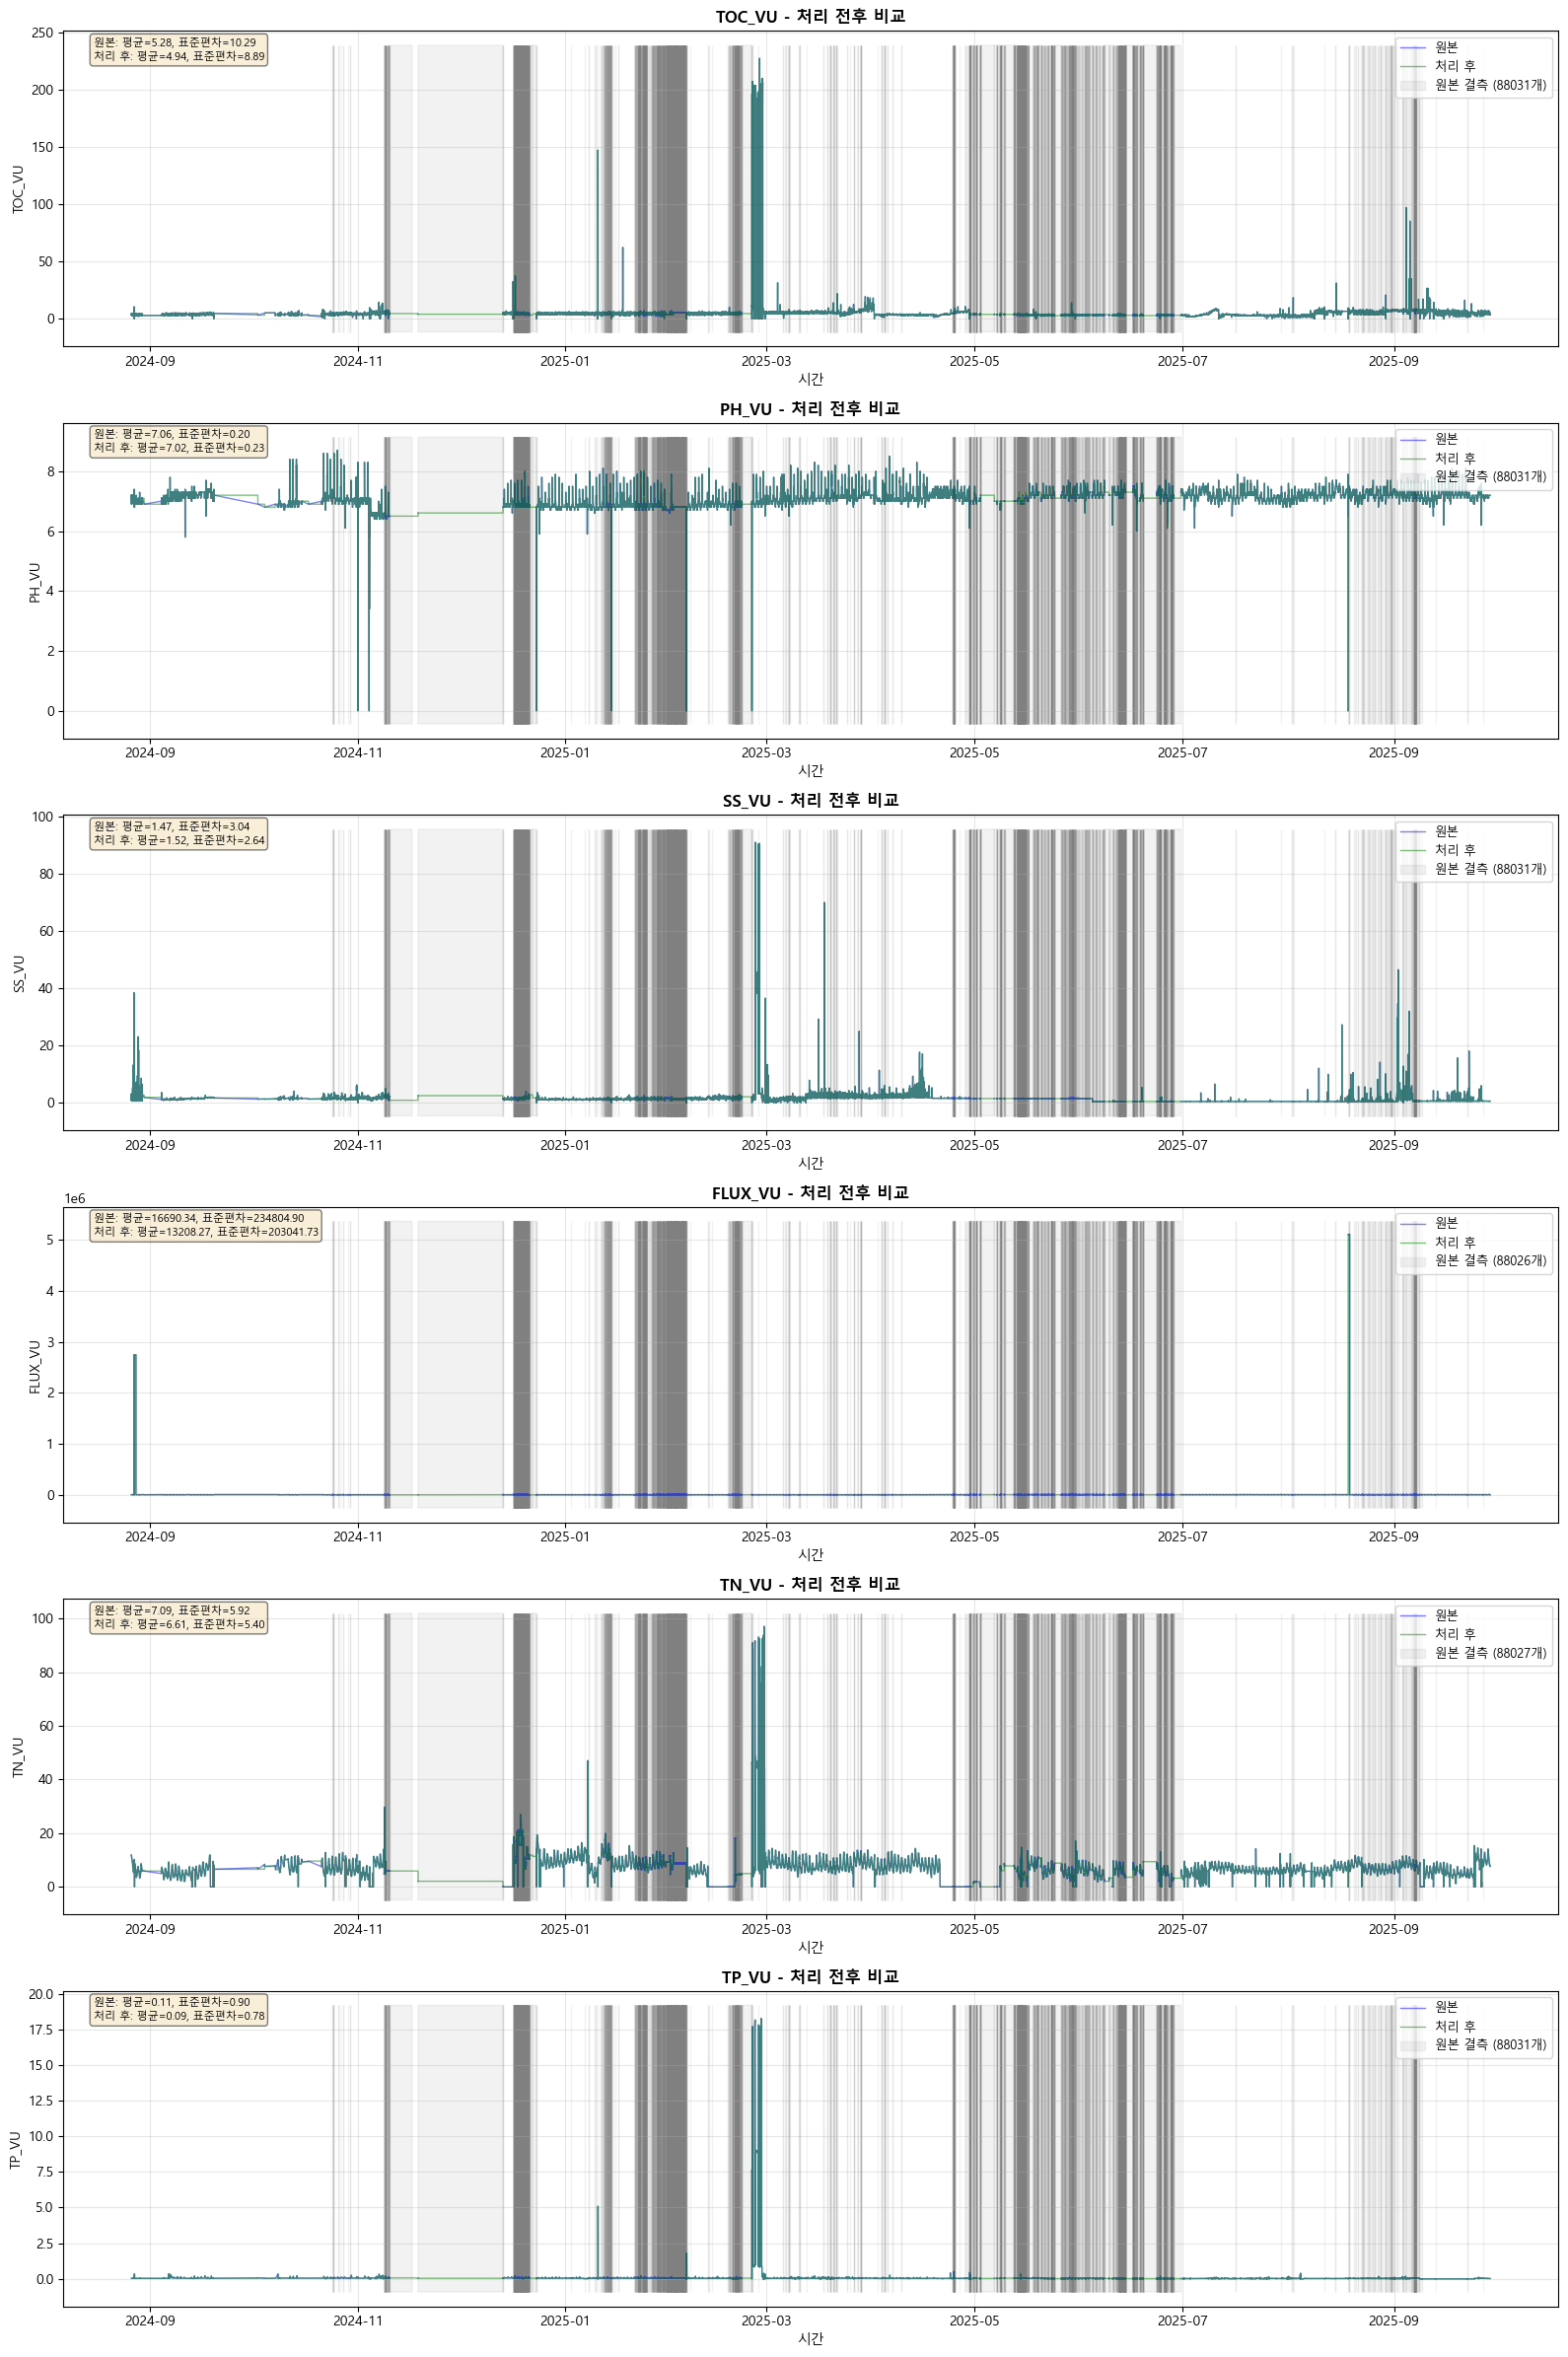

  요약 테이블 저장: ../../results/TMS_summary.csv

################################################################################
# [FLOW] 데이터 처리 시작
################################################################################
0         2025-09-02 23:53
1         2025-09-02 23:54
2         2025-09-02 23:55
3         2025-09-02 23:56
4         2025-09-02 23:57
                ...       
130727    2025-12-03 10:35
130728    2025-12-03 10:36
130729    2025-12-03 10:37
130730    2025-12-03 10:38
130731    2025-12-03 10:39
Name: SYS_TIME, Length: 130732, dtype: str

시간 간격 체크: 1분 간격으로 리샘플링 완료
  원본 행 수: 130732, 처리 후 행 수: 131687

[flow_TankA] 처리 중...
  결측치: 원본 0개 → 이상치 처리 후 955개
  보간 후 결측치: 0개

[flow_TankB] 처리 중...
  결측치: 원본 0개 → 이상치 처리 후 955개
  보간 후 결측치: 0개

[level_TankA] 처리 중...
  결측치: 원본 0개 → 이상치 처리 후 955개
  보간 후 결측치: 0개

[level_TankB] 처리 중...
  결측치: 원본 0개 → 이상치 처리 후 955개
  보간 후 결측치: 0개

[FLOW] 처리 요약
         컬럼  원본_결측 원본_결측률(%)  처리후_결측  원본_평균 처리후_평균 원본_표준편차 처리후_표준편차
 flow_TankA      0      0

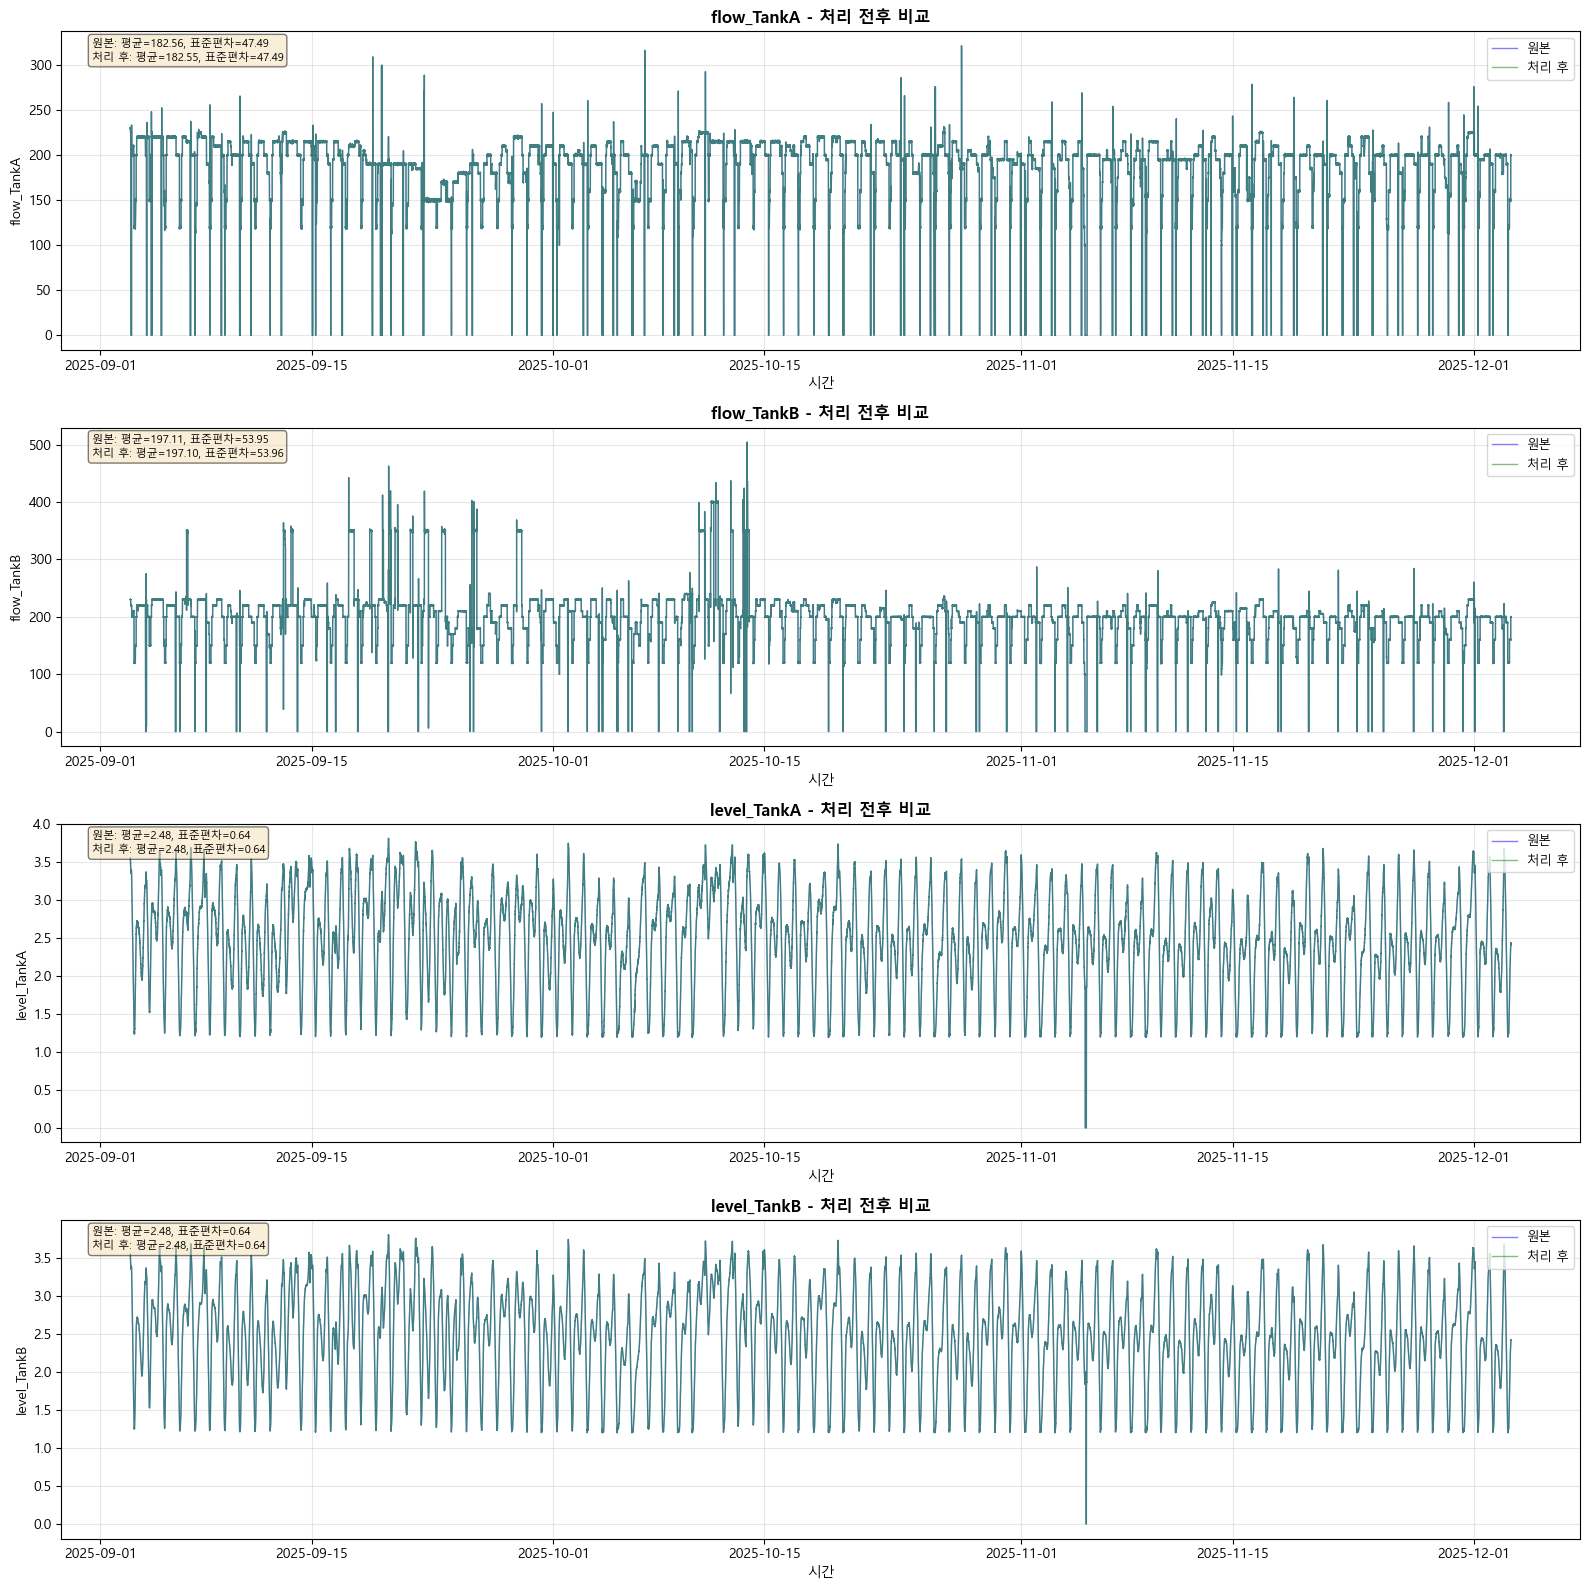

  요약 테이블 저장: ../../results/FLOW_summary.csv

################################################################################
# [AWS368] 데이터 처리 시작
################################################################################
0          2024-08-01 0:00
1          2024-08-01 0:01
2          2024-08-01 0:02
3          2024-08-01 0:03
4          2024-08-01 0:04
                ...       
781870    2026-01-25 23:56
781871    2026-01-25 23:57
781872    2026-01-25 23:58
781873    2026-01-25 23:59
781874     2026-01-26 0:00
Name: datetime, Length: 781875, dtype: str

시간 간격 체크: 1분 간격으로 리샘플링 완료
  원본 행 수: 781875, 처리 후 행 수: 781921

[TA] 처리 중...
  결측치: 원본 10894개 → 이상치 처리 후 10940개
  보간 후 결측치: 0개

[RN_15m] 처리 중...
  결측치: 원본 12636개 → 이상치 처리 후 12682개
  보간 후 결측치: 0개

[RN_60m] 처리 중...
  결측치: 원본 12897개 → 이상치 처리 후 12943개
  보간 후 결측치: 0개

[RN_12H] 처리 중...
  결측치: 원본 17863개 → 이상치 처리 후 17909개
  보간 후 결측치: 0개

[RN_DAY] 처리 중...
  결측치: 원본 12551개 → 이상치 처리 후 12597개
  보간 후 결측치: 0개

[HM] 처리 중...
  결측치: 원본 10894개 → 이

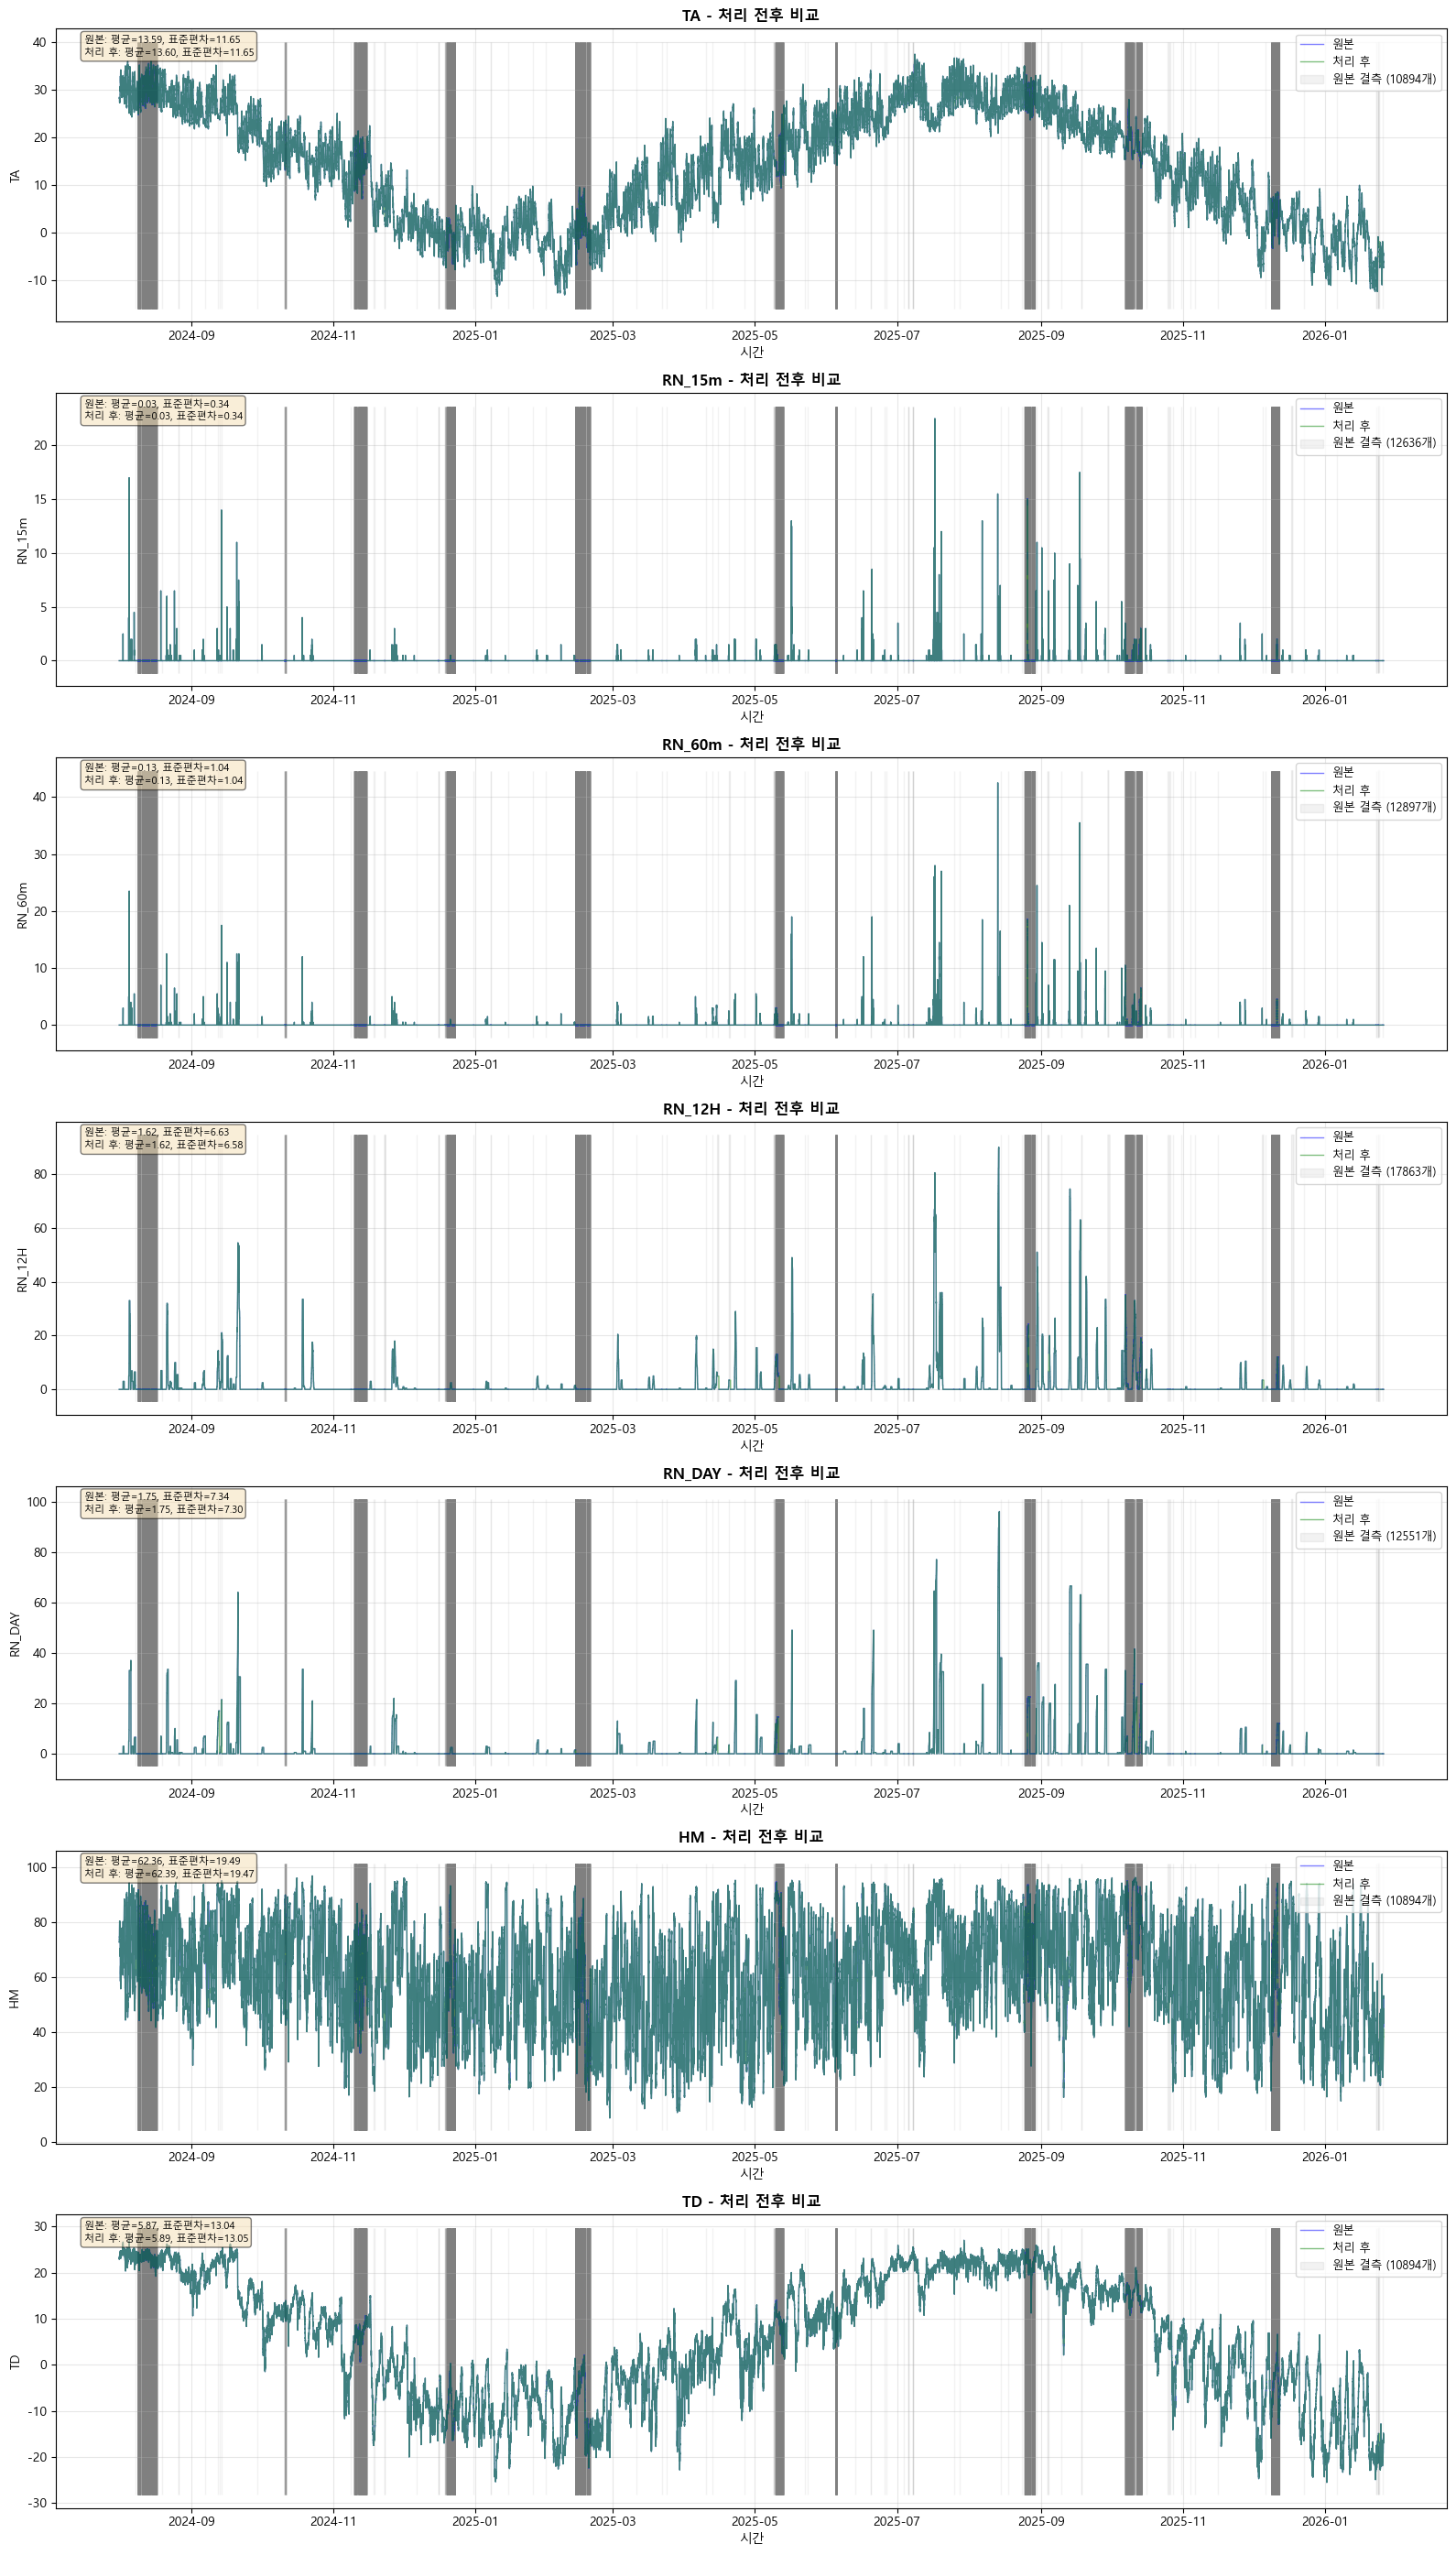

  요약 테이블 저장: ../../results/AWS368_summary.csv

################################################################################
# [AWS541] 데이터 처리 시작
################################################################################
0          2024-08-01 0:00
1          2024-08-01 0:01
2          2024-08-01 0:02
3          2024-08-01 0:03
4          2024-08-01 0:04
                ...       
830875    2026-02-28 23:55
830876    2026-02-28 23:56
830877    2026-02-28 23:57
830878    2026-02-28 23:58
830879    2026-02-28 23:59
Name: datetime, Length: 830880, dtype: str

시간 간격 체크: 이미 1분 간격
  원본 행 수: 830880, 처리 후 행 수: 830880

[TA] 처리 중...
  결측치: 원본 61634개 → 이상치 처리 후 61634개
  보간 후 결측치: 0개

[RN_15m] 처리 중...
  결측치: 원본 67564개 → 이상치 처리 후 67564개
  보간 후 결측치: 0개

[RN_60m] 처리 중...
  결측치: 원본 67953개 → 이상치 처리 후 67953개
  보간 후 결측치: 0개

[RN_12H] 처리 중...
  결측치: 원본 74259개 → 이상치 처리 후 74259개
  보간 후 결측치: 0개

[RN_DAY] 처리 중...
  결측치: 원본 67290개 → 이상치 처리 후 67290개
  보간 후 결측치: 0개

[HM] 처리 중...
  결측치: 원본 60775개 → 이상치 처리

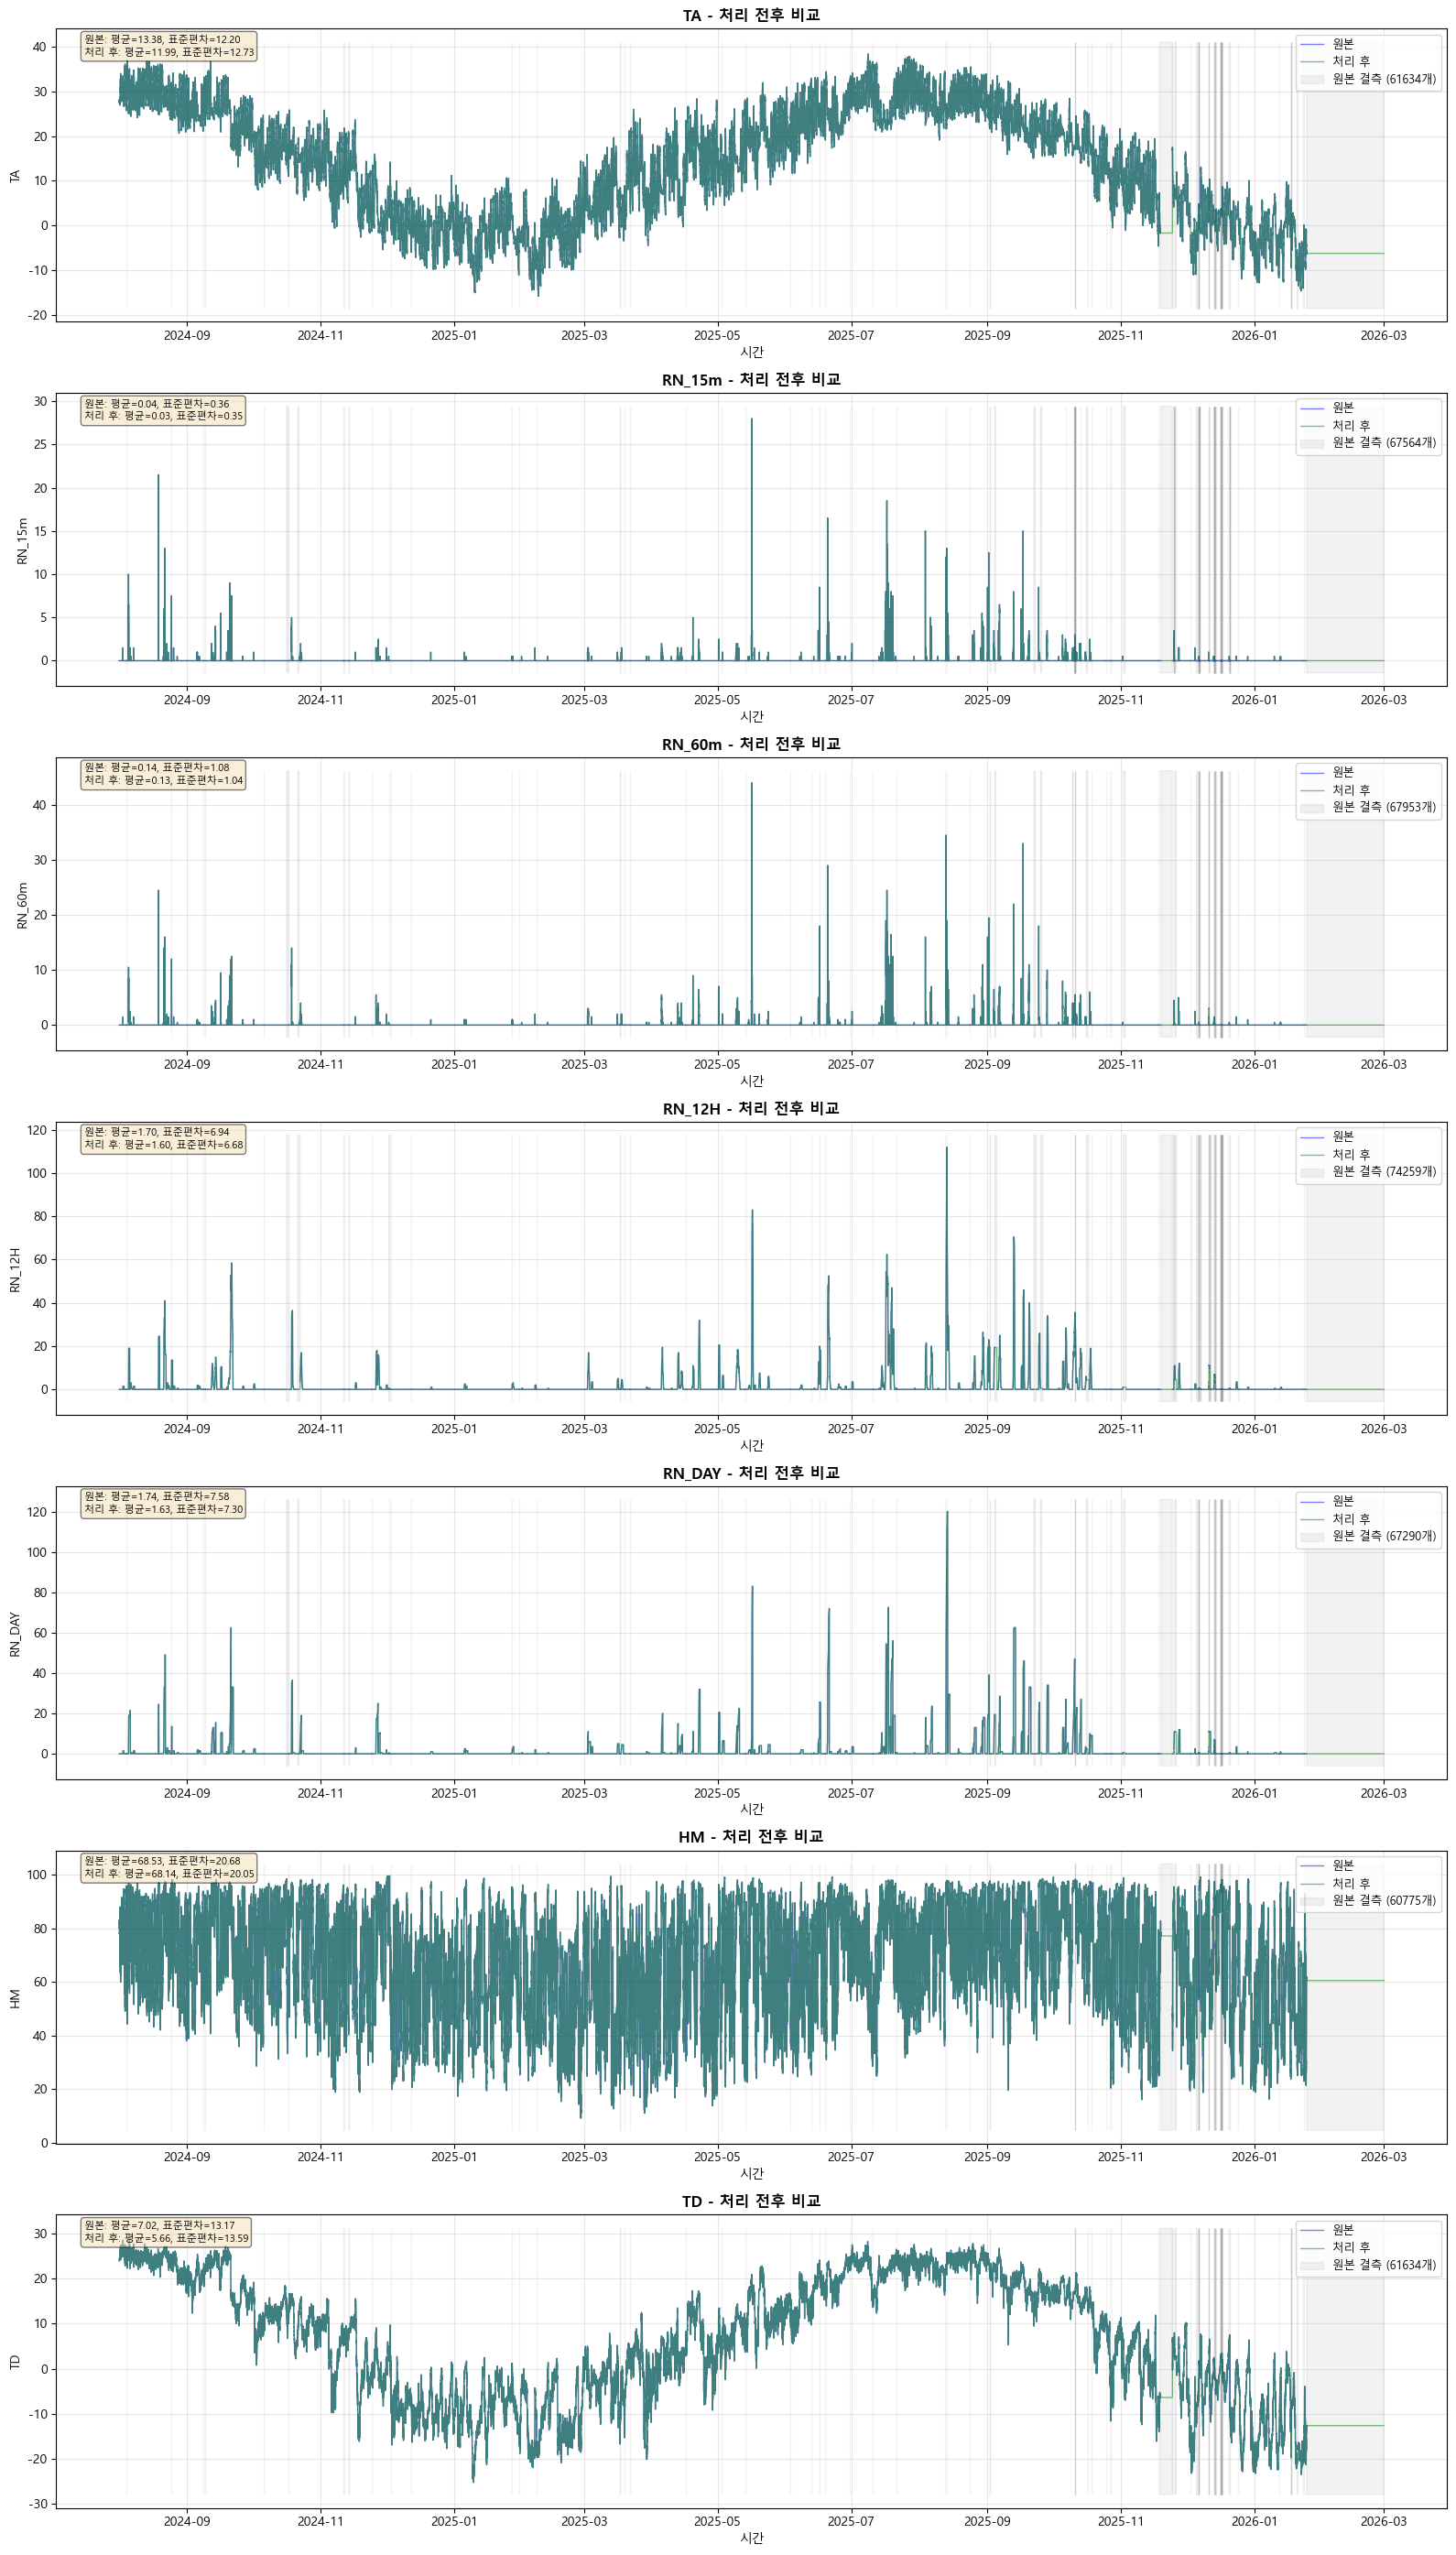

  요약 테이블 저장: ../../results/AWS541_summary.csv

################################################################################
# [AWS569] 데이터 처리 시작
################################################################################
0         2024-08-01 0:00
1         2024-08-01 0:01
2         2024-08-01 0:02
3         2024-08-01 0:03
4         2024-08-01 0:04
               ...       
780785    2026-01-25 5:05
780786    2026-01-25 5:06
780787    2026-01-25 5:07
780788    2026-01-25 5:08
780789    2026-01-25 5:09
Name: datetime, Length: 780790, dtype: str

시간 간격 체크: 이미 1분 간격
  원본 행 수: 780790, 처리 후 행 수: 780790

[TA] 처리 중...
  결측치: 원본 92개 → 이상치 처리 후 92개
  보간 후 결측치: 0개

[RN_15m] 처리 중...
  결측치: 원본 5633개 → 이상치 처리 후 5633개
  보간 후 결측치: 0개

[RN_60m] 처리 중...
  결측치: 원본 6034개 → 이상치 처리 후 6034개
  보간 후 결측치: 0개

[RN_12H] 처리 중...
  결측치: 원본 10795개 → 이상치 처리 후 10795개
  보간 후 결측치: 0개

[RN_DAY] 처리 중...
  결측치: 원본 5517개 → 이상치 처리 후 5517개
  보간 후 결측치: 0개

[HM] 처리 중...
  결측치: 원본 88개 → 이상치 처리 후 88개
  보간 후 결측치: 0개

[TD

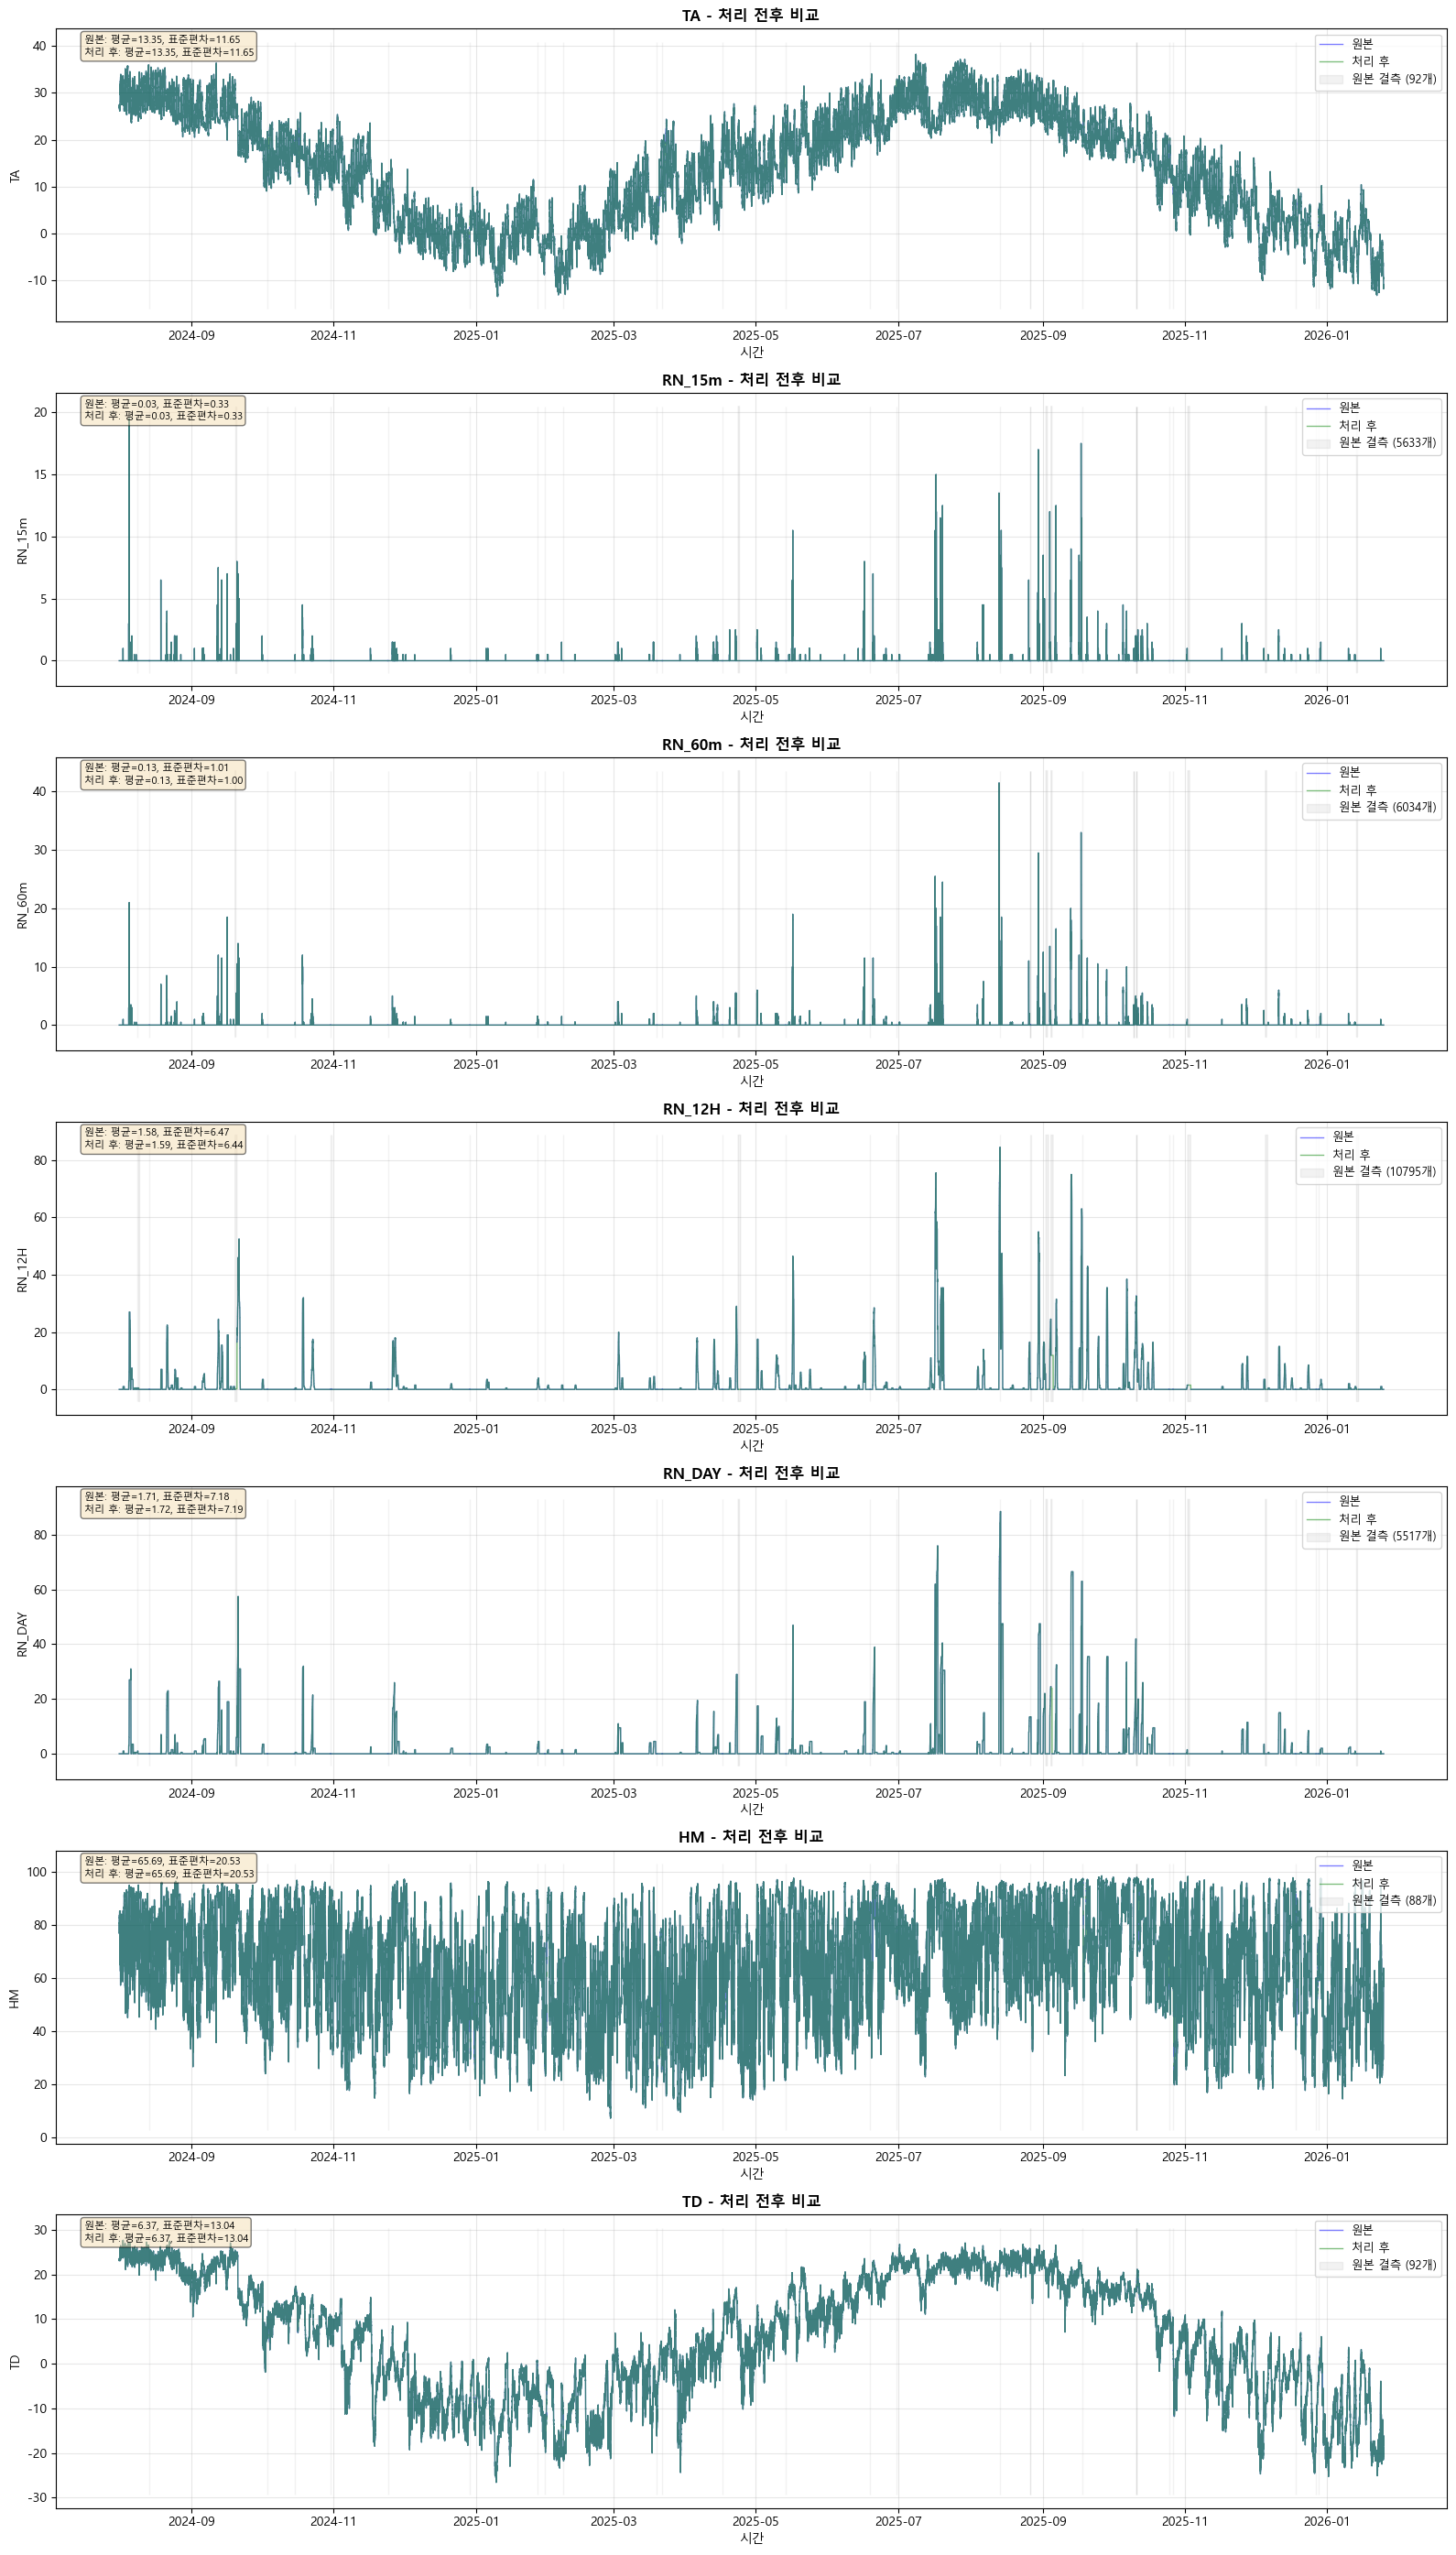

  요약 테이블 저장: ../../results/AWS569_summary.csv


In [83]:
tms_processed = process_dataframe(tms, tms_columns, 'TMS', time_col="SYS_TIME")
flow_processed = process_dataframe(flow, flow_columns, 'FLOW', time_col="SYS_TIME")
aws368_processed = process_dataframe(aws368, aws_columns, 'AWS368', time_col="datetime")
aws541_processed = process_dataframe(aws541, aws_columns, 'AWS541', time_col="datetime")
aws569_processed = process_dataframe(aws569, aws_columns, 'AWS569', time_col="datetime")

In [84]:
tms_processed.to_csv('../../data/processed/TMS_cleaned.csv', index=False, encoding='utf-8-sig')
print("  TMS 저장: data/processed/TMS_cleaned.csv")

flow_processed.to_csv('../../data/processed/FLOW_cleaned.csv', index=False, encoding='utf-8-sig')
print("  FLOW 저장: data/processed/FLOW_cleaned.csv")

aws368_processed.to_csv('../../data/processed/AWS368_cleaned.csv', index=False, encoding='utf-8-sig')
print("  AWS 저장: data/processed/AWS368_cleaned.csv")

aws541_processed.to_csv('../../data/processed/AWS541_cleaned.csv', index=False, encoding='utf-8-sig')
print("  AWS 저장: data/processed/AWS541_cleaned.csv")

aws569_processed.to_csv('../../data/processed/AWS569_cleaned.csv', index=False, encoding='utf-8-sig')
print("  AWS 저장: data/processed/AWS569_cleaned.csv")

  TMS 저장: data/processed/TMS_cleaned.csv
  FLOW 저장: data/processed/FLOW_cleaned.csv
  AWS 저장: data/processed/AWS368_cleaned.csv
  AWS 저장: data/processed/AWS541_cleaned.csv
  AWS 저장: data/processed/AWS569_cleaned.csv


In [85]:
def check_time_interval(df, time_col='time', expected_interval_minutes=1):
    """
    시계열 데이터의 시간 간격을 확인
    
    Parameters:
    -----------
    df : DataFrame
        확인할 데이터프레임
    time_col : str
        시간 컬럼명
    expected_interval_minutes : int
        예상 간격 (분)
    
    Returns:
    --------
    dict : 분석 결과
    """
    # 시간 컬럼을 datetime으로 변환
    df[time_col] = pd.to_datetime(df[time_col])
    
    # 시간 차이 계산 (분 단위)
    time_diffs = df[time_col].diff().dt.total_seconds() / 60
    
    # 첫 번째 값은 NaN이므로 제거
    time_diffs = time_diffs.dropna()
    
    # 통계 계산
    result = {
        '총_데이터_수': len(df),
        '평균_간격(분)': time_diffs.mean(),
        '중앙값_간격(분)': time_diffs.median(),
        '최소_간격(분)': time_diffs.min(),
        '최대_간격(분)': time_diffs.max(),
        '표준편차(분)': time_diffs.std(),
        '예상_간격(분)': expected_interval_minutes,
        '예상_간격_일치_비율(%)': (time_diffs == expected_interval_minutes).sum() / len(time_diffs) * 100
    }
    
    # 간격별 빈도 계산
    interval_counts = time_diffs.value_counts().sort_index()
    
    # 결과 출력
    print(f"\n{'='*80}")
    print(f"시간 간격 분석 결과")
    print(f"{'='*80}")
    print(f"총 데이터 수: {result['총_데이터_수']:,}개")
    print(f"평균 간격: {result['평균_간격(분)']:.2f}분")
    print(f"중앙값 간격: {result['중앙값_간격(분)']:.2f}분")
    print(f"최소 간격: {result['최소_간격(분)']:.2f}분")
    print(f"최대 간격: {result['최대_간격(분)']:.2f}분")
    print(f"표준편차: {result['표준편차(분)']:.2f}분")
    print(f"\n{expected_interval_minutes}분 간격 일치율: {result['예상_간격_일치_비율(%)']:.2f}%")
    
    print(f"\n{'='*80}")
    print(f"간격별 빈도 (상위 10개)")
    print(f"{'='*80}")
    print(interval_counts.head(10))
    
    # 비정상 간격 찾기 (예상 간격이 아닌 경우)
    abnormal_intervals = time_diffs[time_diffs != expected_interval_minutes]
    
    if len(abnormal_intervals) > 0:
        print(f"\n{'='*80}")
        print(f"비정상 간격 발견: {len(abnormal_intervals)}개 ({len(abnormal_intervals)/len(time_diffs)*100:.2f}%)")
        print(f"{'='*80}")
        
        # 비정상 간격의 위치 찾기
        abnormal_indices = abnormal_intervals.index
        abnormal_details = []
        
        for idx in abnormal_indices[:10]:  # 처음 10개만 출력
            prev_idx = df.index[df.index.get_loc(idx) - 1]
            abnormal_details.append({
                '이전_시간': df.loc[prev_idx, time_col],
                '현재_시간': df.loc[idx, time_col],
                '간격(분)': time_diffs.loc[idx]
            })
        
        abnormal_df = pd.DataFrame(abnormal_details)
        print("\n비정상 간격 예시 (처음 10개):")
        print(abnormal_df.to_string(index=False))
    else:
        print(f"\n모든 데이터가 {expected_interval_minutes}분 간격으로 일치합니다!")
    
    return result, interval_counts, abnormal_intervals

In [86]:
def check_missing_timestamps(df, time_col='time', expected_interval_minutes=1):
    """
    누락된 타임스탬프 확인
    
    Parameters:
    -----------
    df : DataFrame
        확인할 데이터프레임
    time_col : str
        시간 컬럼명
    expected_interval_minutes : int
        예상 간격 (분)
    """
    # 시간 컬럼을 datetime으로 변환
    df[time_col] = pd.to_datetime(df[time_col])
    
    # 예상되는 전체 시간 범위 생성
    start_time = df[time_col].min()
    end_time = df[time_col].max()
    expected_range = pd.date_range(start=start_time, end=end_time, 
                                   freq=f'{expected_interval_minutes}min')
    
    # 실제 데이터와 비교
    actual_times = set(df[time_col])
    expected_times = set(expected_range)
    
    missing_times = expected_times - actual_times
    
    print(f"\n{'='*80}")
    print(f"누락된 타임스탬프 분석")
    print(f"{'='*80}")
    print(f"예상 데이터 수: {len(expected_range):,}개")
    print(f"실제 데이터 수: {len(df):,}개")
    print(f"누락된 데이터 수: {len(missing_times):,}개")
    print(f"누락 비율: {len(missing_times)/len(expected_range)*100:.2f}%")
    
    if len(missing_times) > 0:
        missing_sorted = sorted(list(missing_times))[:20]  # 처음 20개만
        print(f"\n누락된 타임스탬프 예시 (처음 20개):")
        for ts in missing_sorted:
            print(f"  {ts}")
    
    return missing_times

In [2]:
tms = pd.read_csv("../../data/processed/TMS_cleaned.csv")
flow = pd.read_csv("../../data/processed/FLOW_cleaned.csv")
aws368 = pd.read_csv("../../data/processed/AWS368_cleaned.csv")
aws541 = pd.read_csv("../../data/processed/AWS541_cleaned.csv")
aws569 = pd.read_csv("../../data/processed/AWS569_cleaned.csv")

In [3]:
# 컬럼명 변경
aws368 = aws368.add_suffix('_368')
aws541 = aws541.add_suffix('_541')
aws569 = aws569.add_suffix('_569')

# join
aws = aws541.join([aws368, aws569], how='left')

In [8]:
aws = aws.set_index('datetime_368')

In [9]:
aws["SYS_TIME"] = aws["datetime_541"]

In [13]:
aws = aws.drop(columns=['datetime_541', 'datetime_569'])

In [ ]:
aws.to_csv('../../data/processed/AWS_cleaned.csv', index=False, encoding='utf-8-sig')

In [ ]:
# TMS 데이터 확인
print("\n" + "="*80)
print("TMS 데이터 시간 간격 확인")
print("="*80)
tms_result, tms_intervals, tms_abnormal = check_time_interval(tms, time_col='SYS_TIME', expected_interval_minutes=1)
tms_missing = check_missing_timestamps(tms, time_col='SYS_TIME', expected_interval_minutes=1)

# FLOW 데이터 확인
print("\n" + "="*80)
print("FLOW 데이터 시간 간격 확인")
print("="*80)
flow_result, flow_intervals, flow_abnormal = check_time_interval(flow, time_col='SYS_TIME', expected_interval_minutes=1)
flow_missing = check_missing_timestamps(flow, time_col='SYS_TIME', expected_interval_minutes=1)

# AWS 데이터 확인
print("\n" + "="*80)
print("AWS 데이터 시간 간격 확인")
print("="*80)
aws_result, aws_intervals, aws_abnormal = check_time_interval(aws, time_col='datetime', expected_interval_minutes=1)
aws_missing = check_missing_timestamps(aws, time_col='datetime', expected_interval_minutes=1)


TMS 데이터 시간 간격 확인

시간 간격 분석 결과
총 데이터 수: 573,975개
평균 간격: 1.00분
중앙값 간격: 1.00분
최소 간격: 1.00분
최대 간격: 1.00분
표준편차: 0.00분

1분 간격 일치율: 100.00%

간격별 빈도 (상위 10개)
SYS_TIME
1.0    573974
Name: count, dtype: int64

모든 데이터가 1분 간격으로 일치합니다!

누락된 타임스탬프 분석
예상 데이터 수: 573,975개
실제 데이터 수: 573,975개
누락된 데이터 수: 0개
누락 비율: 0.00%

FLOW 데이터 시간 간격 확인

시간 간격 분석 결과
총 데이터 수: 131,687개
평균 간격: 1.00분
중앙값 간격: 1.00분
최소 간격: 1.00분
최대 간격: 1.00분
표준편차: 0.00분

1분 간격 일치율: 100.00%

간격별 빈도 (상위 10개)
SYS_TIME
1.0    131686
Name: count, dtype: int64

모든 데이터가 1분 간격으로 일치합니다!

누락된 타임스탬프 분석
예상 데이터 수: 131,687개
실제 데이터 수: 131,687개
누락된 데이터 수: 0개
누락 비율: 0.00%

AWS368 데이터 시간 간격 확인

시간 간격 분석 결과
총 데이터 수: 781,921개
평균 간격: 1.00분
중앙값 간격: 1.00분
최소 간격: 1.00분
최대 간격: 1.00분
표준편차: 0.00분

1분 간격 일치율: 100.00%

간격별 빈도 (상위 10개)
datetime
1.0    781920
Name: count, dtype: int64

모든 데이터가 1분 간격으로 일치합니다!

누락된 타임스탬프 분석
예상 데이터 수: 781,921개
실제 데이터 수: 781,921개
누락된 데이터 수: 0개
누락 비율: 0.00%
